# Loading and Visualizing raw data

The purpose of this notebook is show how to load and visualize the raw data for one subject at a time. 

First, we start by importing libraries we will need. In addition to the usual Python libraries for data analysis (i.e. `pandas`, `numpy`, `matplotlib`), we will be using `nibabel` to read in image from multiple formats.

In [2]:
import pandas as pd
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

%matplotlib inline

Now we will load the T1-weighted images for this subject.

In [11]:
T1 = nib.load('../ds000115/sub-01/anat/sub-01_T1w.nii.gz')

## Components of an image object
The image object consist of an image header, an image data array and an affine array. We will ignore the affine array for now.

We won't go into detail about the header either. But to look at the metadata, contained in the header we can use 

```python
print(T1.header)
```

Now let's focus on the image data array.

### Image data array
First, let's look at the shape of the image

In [28]:
T1.shape

(176, 256, 256)

The articles describes the T1 weighted image as follows:
> a T1 structural image was acquired using a sagittal MP-RAGE 3D sequence (TR = 2400 ms, TE = 3.16 ms, ﬂip = 8˚; voxel size = 1 mm × 1 mm × 1 mm). 

Therefore, this image consists of 176 slices where the acquisition was from left to right (i.e. the x-dimension). 

In [32]:
img = T1.get_fdata()

Text(0.5, 0.98, 'Center slices for EPI image')

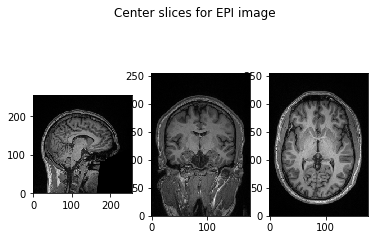

In [35]:
# import matplotlib.pyplot as plt

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = img[80, :, :]
slice_1 = img[:, 125, :]
slice_2 = img[:, :, 125]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

There exists a more elegant option for plotting. We can use the plotting functions from `nilearn` to handle plotting directly from feeding it the NIfTI object.

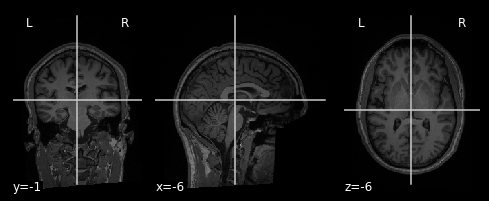

In [48]:
from nilearn import plotting as nlplt

nlplt.plot_anat(T1)

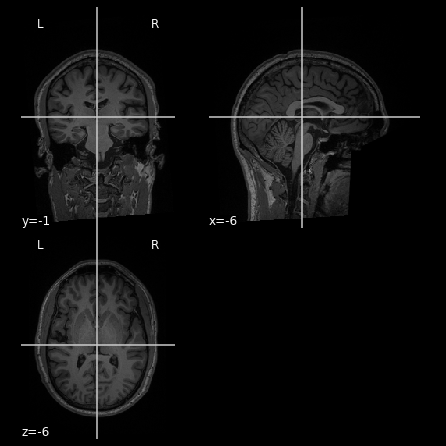

In [49]:
nlplt.plot_anat(T1,
               display_mode='tiled')

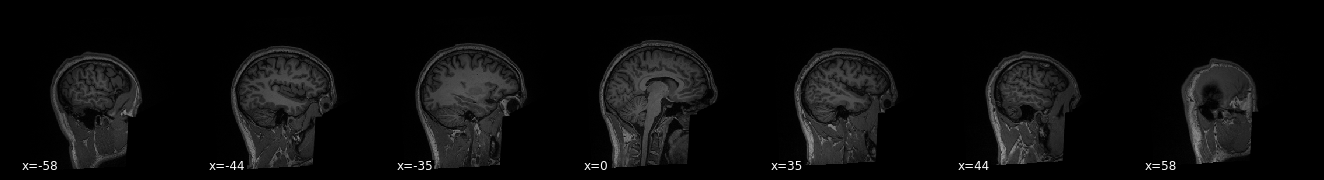

In [59]:
x = T1.shape[0]
nlplt.plot_anat(T1,
                cut_coords = (-x/3, -x/4, -x/5, 0, 
                             x/5, x/4, x/3),
               display_mode='x')

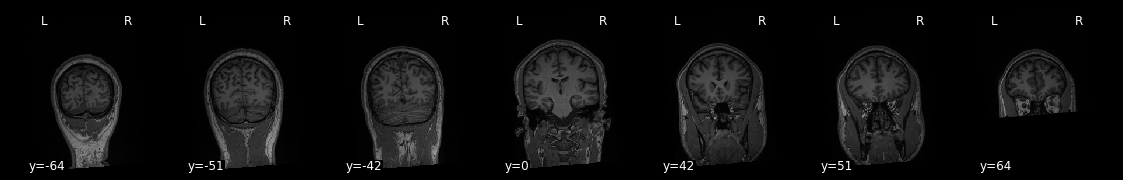

In [63]:
y = T1.shape[1]
nlplt.plot_anat(T1,
                cut_coords = (-y/4, -y/5, -y/6, 0, 
                             y/6, y/5, y/4),
               display_mode='y')

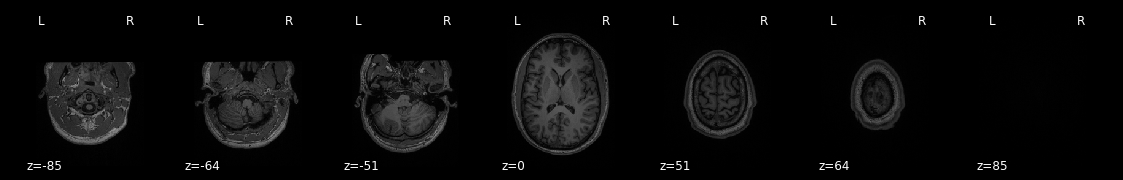

In [64]:
z = T1.shape[2]
nlplt.plot_anat(T1,
                cut_coords = (-z/3, -z/4, -z/5, 0, 
                             z/5, z/4, z/3),
               display_mode='z')